In [19]:
import pandas as pd
import math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from matplotlib import style

In [20]:
df = pd.read_csv("dummies_data.csv")
df.head()

,Unnamed: 0,daycode,month,holidays,load,temp,cdd,hdd,season_F,season_S,...,season_W,weather_type_cold,weather_type_hot,weather_type_mild,hr_weather_type_cold,hr_weather_type_hot,hr_weather_type_mild,hr_weather_type_xcold,hr_weather_type_xhot,hr_weather_type_xxhot
0,0,0,1,1,1.108011,70,5,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1,1,1,1,0,1.255454,67,2,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,2,2,1,1,1.074134,70,5,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,3,3,1,1,1.328308,52,0,8,0,0,...,1,1,0,0,1,0,0,0,0,0
4,4,4,1,1,1.222549,56,0,4,0,0,...,1,1,0,0,1,0,0,0,0,0


In [21]:
df = df.drop('Unnamed: 0', axis=1)
df.head(1)

,daycode,month,holidays,load,temp,cdd,hdd,season_F,season_S,season_Sp,season_W,weather_type_cold,weather_type_hot,weather_type_mild,hr_weather_type_cold,hr_weather_type_hot,hr_weather_type_mild,hr_weather_type_xcold,hr_weather_type_xhot,hr_weather_type_xxhot
0,0,1,1,1.108011,70,5,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [22]:
forecast_col = 'load'

In [23]:
# math.ceil gets round
forecast_out = int(math.ceil(0.2*len(df)))
print(forecast_out)

71


In [24]:
# need labels, adjusted load values  
df['label'] = df[forecast_col].shift(-forecast_out)
df.head()

,daycode,month,holidays,load,temp,cdd,hdd,season_F,season_S,season_Sp,...,weather_type_cold,weather_type_hot,weather_type_mild,hr_weather_type_cold,hr_weather_type_hot,hr_weather_type_mild,hr_weather_type_xcold,hr_weather_type_xhot,hr_weather_type_xxhot,label
0,0,1,1,1.108011,70,5,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0.830489
1,1,1,0,1.255454,67,2,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0.840282
2,2,1,1,1.074134,70,5,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0.768609
3,3,1,1,1.328308,52,0,8,0,0,0,...,1,0,0,1,0,0,0,0,0,0.847682
4,4,1,1,1.222549,56,0,4,0,0,0,...,1,0,0,1,0,0,0,0,0,0.941014


In [25]:
###
# Train and Test 
### 

# define X and scale it 

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)

X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [26]:
# redefine X 
df.dropna(inplace=True)
y = np.array(df['label'])

In [27]:
print(len(X), len(y))

284 284


In [28]:
# train and test data, 20% for test data 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size = 0.2)

In [29]:
# clasifiers
# n_jobs means number of jobs, -1 means as many as 
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [30]:
# test the accuracy of the test data 
accuracy = clf.score(X_test, y_test)
accuracy

0.3347201954804472

In [31]:
# forecast set
# prediction with sklearn
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[ 1.28629428  1.28800327  1.17423373  1.19913608  1.21329623  1.0682767
  0.78800327  0.84147006  1.2167142   1.15641147  0.88150913  1.24039584
  1.22916538  1.00113803  1.27213413  1.28922397  1.28043491  0.6061185
  0.94596225  0.707681    0.7792142   1.18692905  0.68790561  0.71720248
  1.16153842  1.11490756  1.04508334  1.07047397  0.59073764  0.6151517
  0.59855014  0.95792514  0.43058139  0.85123569  0.74649936  0.75431186
  0.93009311  0.73380405  0.74747592  0.73868686 -0.823569   -0.77620572
 -0.79671353 -0.45882291 -0.97737759 -0.68685025 -0.60774869 -0.70931119
 -1.00520962 -0.97542447 -0.59651822 -1.16683072 -1.11067837 -0.54622525
 -1.23470181 -1.03157681 -0.57698697 -0.78499478 -0.55184048 -0.87727994
 -0.53157681 -0.5501315  -1.35628384 -1.14485806 -0.62337369 -0.46614712
 -0.75520962 -0.66438931 -1.23876828 -1.12792844 -0.60351437] 0.3347201954804472 71


In [32]:
raw_data = {"Date":'2017-12-31'}
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data = pd.DataFrame(raw_data,  index=[0])

last_date = raw_data.iloc[0]['Date']

In [33]:
###
# Plot the data and the date
###

df['Forecast'] = np.nan

# the last day
last_date = raw_data.iloc[0]['Date']
# print(last_date)
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

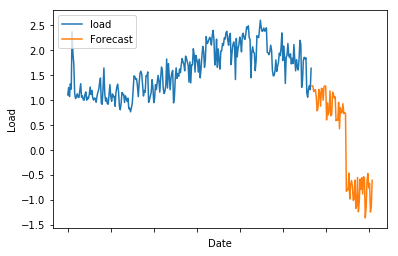

In [34]:
# populate df with the new dates
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

# Plot the data
df['load'].plot()
df['Forecast'].plot()

plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Load')
plt.show()